In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import os

In [46]:
categories = ['cats', 'dogs']
flat_data_arr=[] #input array 
target_arr=[] #output array 
datadir='training_set/' 
#path which contains all the categories of images 
for i in categories: 
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=plt.imread(os.path.join(path,img)) 
        img_resized=np.resize(img_array,(150,150,3)) 
        flat_data_arr.append(img_resized.flatten()) 
        target_arr.append(categories.index(i)) 
    print(f'loaded category:{i} successfully') 
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [47]:
flat_data.shape

(960, 67500)

In [52]:
df = pd.DataFrame(flat_data)
df['Target']= target
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10, 
                                               random_state=77, 
                                               stratify=y) 

In [53]:
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['rbf','poly']} 
  
# Creating a support vector classifier 
svc=svm.SVC() 
  
# Creating a model using GridSearchCV with the parameters grid 
svc.fit(x_train,y_train)

SVC()

In [54]:
y_pred = svc.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

The model is 62.5% accurate


              precision    recall  f1-score   support

           0       0.62      0.62      0.62        48
           1       0.62      0.62      0.62        48

    accuracy                           0.62        96
   macro avg       0.62      0.62      0.62        96
weighted avg       0.62      0.62      0.62        96



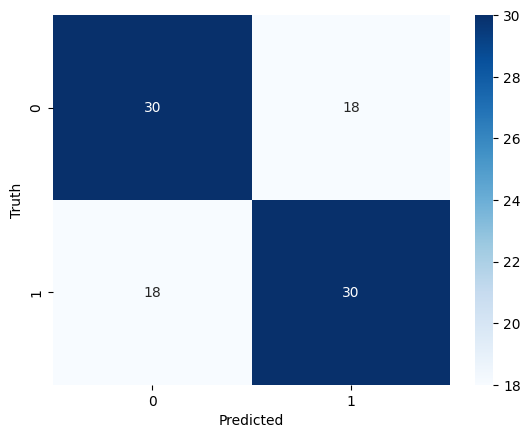

In [55]:
# now lets plot the confusion matrix
cm = confusion_matrix(y_pred, y_test)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_pred, y_test))
